<a href="https://colab.research.google.com/github/swikriti15/parkinson-ml/blob/main/AQIipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


MSE: 137.7388710526316
RMSE: 11.73622047563148
R^2 Score: 0.9768958619422282


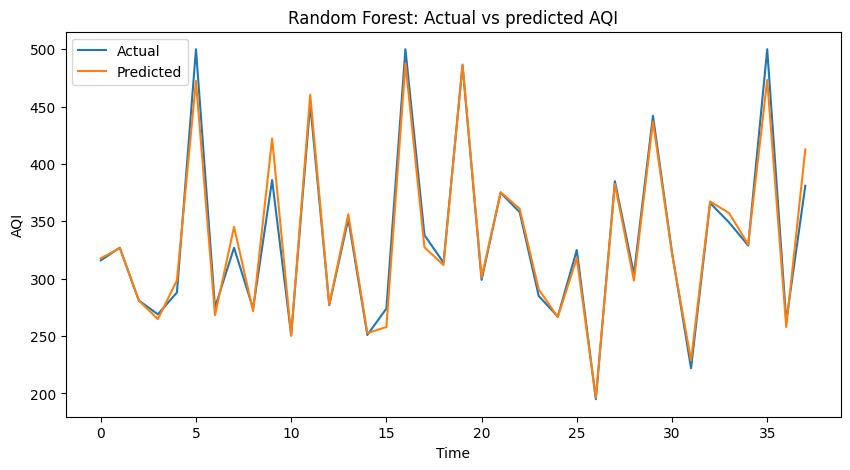

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import RandomForestRegressor instead of SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/cleaned_air_quality.csv")

# Convert 'DateTime' to datetime objects if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayOfYear'] = df['DateTime'].dt.dayofyear
df['Month'] = df['DateTime'].dt.month

# Remove non-numeric columns and the original Date, Time, DateTime columns
X = df.drop(["PM2.5 AQI", "Date", "Time", "DateTime"], axis=1)
y = df["PM2.5 AQI"]

# Split data into training and testing sets AFTER handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Random Forest: Actual vs predicted AQI")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.show()